In [1]:
# import the required libraries
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

%matplotlib inline

In [2]:
# https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

## <font color = 'orange'>Gathering data source 1<br> twitter1 data frame </font>

In [3]:
# read the enhanced twitter archive file 
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')

## Assess
#### twitter1 Data Frame

## <font color = 'blue'> Visual Assessment</font>

In [4]:
#pd.options.display.max_rows = 3000;
twitter1.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
# check the number of rows and columns
twitter1.shape

(2356, 17)

In [6]:
twitter1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1908,674436901579923456,NaN,NaN,2015-12-09 03:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bailey. She plays with her food. Very chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None
597,798694562394996736,NaN,NaN,2016-11-16 01:09:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I'm not sure what's happening h...,7.012147e+17,4.196984e+09,2016-02-21 01:19:47 +0000,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,None,None,None,None


## <font color = 'blue'> Programmatic Assessment</font>

In [7]:
# check the data type for each column and the missing values
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# check the missing values
twitter1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
twitter1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check the columns names
twitter1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### <font color = 'blue'>Programmatic Assessment with Visual Assessment</font>

In [11]:
# check if we have duplicated id
twitter1[twitter1.duplicated(subset = 'tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
# check the duplicated cells in `in_reply_to_status_id`
twitter1[twitter1.duplicated(subset = 'in_reply_to_status_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [13]:
# we can notice that this is the number of missing values in `in_reply_to_status_id`
len(twitter1[twitter1.duplicated(subset = 'in_reply_to_status_id')])

2278

In [14]:
# check the non duplicated cells in `in_reply_to_status_id`
twitter1[~twitter1.duplicated(subset = 'in_reply_to_status_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [15]:
# check the number of non duplicated in `in_reply_to_status_id`
len(twitter1[~twitter1.duplicated(subset = 'in_reply_to_status_id')])

78

In [16]:
# check the numbers of duplicated cells in `in_reply_to_user_id`
len(twitter1[twitter1.duplicated(subset = 'in_reply_to_user_id')])

2324

In [17]:
# check the duplicated cells in `in_reply_to_user_id`
twitter1[twitter1.duplicated(subset = 'in_reply_to_user_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [18]:
# check the number of non duplicated cells in `in_reply_to_user_id`
len(twitter1[~twitter1.duplicated(subset = 'in_reply_to_user_id')])

32

In [19]:
# check the non duplicated cells in `in_reply_to_user_id`
twitter1[~twitter1.duplicated(subset = 'in_reply_to_user_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [20]:
# check the duplicated cells in ` in_reply_to_user_id` without the duplicated missing values
twitter1[twitter1.duplicated(subset = 'in_reply_to_user_id') != twitter1.in_reply_to_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
498,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I've been informed that Augie was act...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None


In [21]:
# the number of duplicated cells in `in_reply_to_user_id` without the duplicated missing values
len(twitter1[twitter1.duplicated(subset = 'in_reply_to_user_id') != twitter1.in_reply_to_user_id.isnull()])

48

In [22]:
# notice that most of the duplicated cells in `in_reply_to_user_id` are missing values
2324 - 46

2278

In [23]:
# the number of duplicated cells in `retweeted_status_id` without the duplicated missing values
len(twitter1[twitter1.duplicated(subset = 'retweeted_status_id') != twitter1.retweeted_status_id.isnull()])

1

In [24]:
# check the duplicated cells in ` retweeted_status_id` without the duplicated missing values
twitter1[twitter1.duplicated(subset = 'retweeted_status_id') != twitter1.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [25]:
# the number of duplicated cells in `retweeted_status_user_id` without the duplicated missing values
len(twitter1[twitter1.duplicated(subset = 'retweeted_status_user_id') != twitter1.retweeted_status_user_id.isnull()])

157

In [26]:
# check the duplicated cells in ` retweeted_status_id` without the duplicated missing values
twitter1[twitter1.duplicated(subset = 'retweeted_status_user_id') != twitter1.retweeted_status_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None


In [27]:
# the number of duplicated cells in `retweeted_status_timestamp` without the duplicated missing values
len(twitter1[twitter1.duplicated(subset = 'retweeted_status_timestamp') != twitter1.retweeted_status_timestamp.isnull()])

1

In [28]:
# check the duplicated cells in ` retweeted_status_timestamp` without the duplicated missing values
twitter1[twitter1.duplicated(subset = 'retweeted_status_timestamp') != twitter1.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [29]:
# the number of duplicated cells in `expanded_urls` without the duplicated missing values
len(twitter1[twitter1.duplicated(subset = 'expanded_urls') != twitter1.expanded_urls.isnull()])

80

In [30]:
# check the duplicated cells in ` expanded_urls` without the duplicated missing values
twitter1[twitter1.duplicated(subset = 'expanded_urls') != twitter1.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None


In [31]:
twitter1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
twitter1['text'].value_counts()

This is Amélie. She is a confident white college girl. Extremely intimidating. Literally can't rn omg. 11/10 fab https://t.co/up0MHRxelf                              1
Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl                              1
This is Fred. He's having one heck of a summer. 11/10 https://t.co/I7SFchkNk4                                                                                         1
This is Berkeley. He's in a predicament. 10/10 someone help him https://t.co/XSEXdQupej                                                                               1
The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you                                                                              1
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk                                                                                         

In [33]:
pd.DataFrame(twitter1.rating_numerator.value_counts())

,rating_numerator
12,558
11,464
10,461
13,351
9,158
8,102
7,55
14,54
5,37
6,32


In [34]:
twitter1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
# check the names in the name column
twitter1.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
an                7
Toby              7
Bailey            7
Daisy             7
Buddy             7
Jack              6
Koda              6
Jax               6
Rusty             6
Scout             6
Milo              6
Stanley           6
Leo               6
Bella             6
Dave              6
Oscar             6
Finn              5
               ... 
Baron             1
Grizz             1
Meatball          1
Coleman           1
Fwed              1
Freddery          1
Binky             1
Bobb              1
Combo             1
William           1
Grey              1
Vixen             1
Cleopatricia      1
Steve             1
Cal               1
Iroh              1
Jeb               1
Crouton           1
Sully             1


In [36]:
# check the names in the name column
twitter1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [37]:
# check if we have missing values in the name column
np.sum(twitter1.name.isnull())

0

In [38]:
# check the names that start with small capital letter
lowercase_names = []
for row in twitter1['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [39]:
twitter1.loc[twitter1['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [40]:
# check the missing values in doggo column
np.sum(twitter1.doggo.isnull())

0

In [41]:
twitter1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [42]:
np.sum(twitter1.floofer.isnull())

0

In [43]:
twitter1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [44]:
np.sum(twitter1.pupper.isnull())

0

In [45]:
twitter1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [46]:
np.sum(twitter1.puppo.isnull())

0

In [47]:
twitter1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [48]:
pd.DataFrame(twitter1.rating_numerator.sort_values())

,rating_numerator
315,0
1016,0
2335,1
2261,1
2338,1
605,1
1446,1
1869,1
2091,1
2038,1


## Tidiness issues
- 1 variable (dog species and breed) in 4 different columns (doggo, floofer, pupper, and puppo)

## Quality issues

#### 1 - some names are inaccurate such as "a", "an", "the", "very", "by", etc.and more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old", and I will suppose 'O' real name.
we can drop them using filter: (filtered_twitter=twitter.loc[~twitter.name.isin(lowercase_names)])
#### 2 -  name has values that are the string "None" instead of NaN
#### 3 - rating_numerator should has float Data type
#### 4 - rating_denominator should has float Data type
#### 5 - Inaccurate ratings
#### 6 - Unstandardized ratings


#### 7 -  `timestamp` & `retweeted_status_timestamp`  currently of type 'object

####  8 -  There are many columns in this dataframe making it hard to read, and some will not be needed for analysis like 'in_reply_to_status_id' , 'in_reply_to_user_id' 


# <font color = 'red'> Clean <br>first Data Frame `twitter1`</font>

In [85]:
# Make a copy of the Data Frame before start cleaning

twitter1_clean = twitter1.copy()

## Tidiness issue One column for dog stages
# Define

Issue: 1 variable (dog_breed) in 4 different columns (doggo, floofer, pupper, and puppo)
Solution: Extract the dog breeds from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".


In [86]:
twitter1_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

### Code

In [87]:
# Replace all 'None's with a NaN
twitter1_clean['doggo'].replace('None',np.nan,inplace = True)
twitter1_clean['floofer'].replace('None',np.nan,inplace = True)
twitter1_clean['pupper'].replace('None',np.nan,inplace = True)
twitter1_clean['puppo'].replace('None',np.nan,inplace = True)

In [90]:
dog_type = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in twitter1_clean['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_type.append(y[x.index(word)])
            break
    else:
        dog_type.append(np.nan)

twitter1_clean['dog_breed'] = dog_type

In [91]:
twitter1_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'dog_breed'],
      dtype='object')

In [92]:
# Check that first few instances of dog_breed are similar 
# to that which was previously extracted
twitter1_clean[['dog_breed','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_breed,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,doggo,doggo,NaN,NaN,NaN


In [110]:
#Drop doggo, floofer, pupper, and puppo columns
twitter1_clean = twitter1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

## programmatic Test

In [93]:
twitter1_clean['dog_breed'].value_counts()

pupper    283
doggo      93
puppo      38
floof      37
Name: dog_breed, dtype: int64

In [94]:
twitter1_clean.dog_breed.isnull().sum()

1905

In [95]:
twitter1.shape , twitter1_clean.shape

((2356, 17), (2356, 18))

In [96]:
# Check for presence of 'dog_breed' and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dog_breed                     451 non-n

## Visual Test

In [97]:
twitter1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


## Programmatic Test

In [98]:
twitter1_clean.dog_breed.unique()

array([nan, 'doggo', 'puppo', 'floof', 'pupper'], dtype=object)

In [99]:
twitter1_clean.dog_breed.isnull().sum()

1905


### Quality issue Various issues with 'name'
#### Define

#### Issue:

    name has values that are the string "None" instead of NaN
    Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
    

##### Solution: make filter

## code

In [100]:
# Find all names that start with a lowercase letter
lowercase_names1 = []
for row in twitter1_clean['name']:
    if row[0].islower() and row not in lowercase_names1:
        lowercase_names1.append(row)
print(lowercase_names1)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [101]:
# drop the rows that contain the lowercase_names1 in the name column
twitter1_clean=twitter1_clean.loc[~twitter1_clean.name.isin(lowercase_names)]
# drop the rows that contain None in the name column
twitter1_clean=twitter1_clean.loc[~twitter1_clean.name.str.contains('None')]

### Programmatic with Visual Test

In [102]:
twitter1.shape , twitter1_clean.shape

((2356, 17), (1502, 18))

In [103]:
# should output empty list
lowercase_names2 = []
for row in twitter1_clean['name']:
    if row[0].islower() and row not in lowercase_names2:
        lowercase_names2.append(row)
print(lowercase_names2)

[]


In [104]:
# we shouldn't find None
np.sort(twitter1_clean.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

### Quality issue - rating_numerator should has float Data type
### Define

In [105]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 18 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null object
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null int64
rating_denominator            1502 non-null int64
name                          1502 non-null object
doggo                         49 non-null object
floofer                       5 non-null object
pupper                        134 non-null object
puppo                         20 non-null object
dog_breed                     237 non-null

### Code

In [106]:
twitter1_clean['rating_numerator'] = twitter1_clean['rating_numerator'].astype('float64')

### ProgrammaticTest

In [107]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 18 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null object
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null float64
rating_denominator            1502 non-null int64
name                          1502 non-null object
doggo                         49 non-null object
floofer                       5 non-null object
pupper                        134 non-null object
puppo                         20 non-null object
dog_breed                     237 non-nu

### Quality issue - rating_denominator should has float Data type

### code

In [108]:
twitter1_clean['rating_denominator'] = twitter1_clean['rating_denominator'].astype('float64')

### Programmatic Test

In [109]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 18 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null object
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null float64
rating_denominator            1502 non-null float64
name                          1502 non-null object
doggo                         49 non-null object
floofer                       5 non-null object
pupper                        134 non-null object
puppo                         20 non-null object
dog_breed                     237 non-

#### Quality issue - Inaccurate ratings
### Define

* Issue: Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

* Solution: Find all instances of ratings that contained decimals and replace the numerator values with the correct values.


# <font color = 'green' >Code </font>

In [111]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter1_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]

In [112]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[45, 340, 695, 763]

In [113]:
ratings_with_decimals

['13.5', '9.75', '9.75', '11.27']

## Assess

In [114]:
twitter1_clean.loc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

In [115]:
twitter1_clean.loc[340]

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [116]:
twitter1_clean.loc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-13 23:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                             75
rating_denominator                                                           10
name                                    

In [117]:
twitter1_clean.loc[763]

tweet_id                                                     778027034220126208
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-09-20 00:24:34 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Sophie. She's a Jubilant Bush Pupper. ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                             27
rating_denominator                                                           10
name                                    

In [118]:
twitter1_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed'],
      dtype='object')

## code

In [119]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter1_clean.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter1_clean.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter1_clean.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter1_clean.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

# <font color='green'> Test </font>

In [120]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter1_clean.loc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

In [121]:
twitter1_clean.loc[340]

tweet_id                                                     832215909146226688
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-02-16 13:11:49 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Logan, the Chow who liv...
retweeted_status_id                                                 7.86709e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2016-10-13 23:23:56 +0000
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                           9.75
rating_denominator                                                           10
name                                    

In [122]:
twitter1_clean.loc[695]

tweet_id                                                     786709082849828864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-10-13 23:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Logan, the Chow who lived. He solemnly...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                           9.75
rating_denominator                                                           10
name                                    

In [123]:
twitter1_clean.loc[763]

tweet_id                                                     778027034220126208
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-09-20 00:24:34 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Sophie. She's a Jubilant Bush Pupper. ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                          11.27
rating_denominator                                                           10
name                                    


### Quality issue - Unstandardized ratings
## Define

- Issue: For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
- Solution: Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### code

In [124]:
# Calulate the value of 'rating'
twitter1_clean['rating'] = twitter1_clean['rating_numerator'] / twitter1_clean['rating_denominator']

### Visual Test

In [125]:
# Check for presence of new column and correct calculation
twitter1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3


In [126]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 15 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null object
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null float64
rating_denominator            1502 non-null float64
name                          1502 non-null object
dog_breed                     237 non-null object
rating                        1502 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 227.8+ KB


### Quality issue - 'timestamp' 
### Define
- Issue: 'timestamp' & 'retweeted_status_timestamp' are currently of type 'object'
- Solution: Convert 'timestamp'  to a datetime object
## code

In [127]:
twitter1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3


In [128]:
twitter1_clean.timestamp.isnull().sum()

0

In [129]:
# Remove the time zone information from 'timestamp' column
twitter1_clean['timestamp'] = twitter1_clean['timestamp'].str.slice(start=0, stop=-6)

In [130]:
# Change the 'timestamp' column to a datetime 
twitter1_clean['timestamp'] = pd.to_datetime(twitter1_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

## Visual Test

In [131]:
twitter1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3


In [132]:
twitter1_clean.timestamp.isnull().sum()

0

# code

In [133]:
twitter1_clean['timestamp'] = pd.to_datetime(twitter1_clean['timestamp'])

## Programmatic Test

In [134]:
twitter1_clean.timestamp.isnull().sum()

0

In [135]:
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 15 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null datetime64[ns]
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null object
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null float64
rating_denominator            1502 non-null float64
name                          1502 non-null object
dog_breed                     237 non-null object
rating                        1502 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 227.8+ KB


## Visual Test

In [136]:
twitter1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,1.2


## code

In [137]:
twitter1_clean.retweeted_status_timestamp.isnull().sum()

1391

In [138]:
# Remove the time zone information from 'retweeted_status_timestamp' column
twitter1_clean['retweeted_status_timestamp'] = twitter1_clean['retweeted_status_timestamp'].str.slice(start=0, stop=-6)

In [139]:
# Change the 'retweeted_status_timestamp' column to a datetime 
twitter1_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter1_clean['retweeted_status_timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [140]:
twitter1_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter1_clean['retweeted_status_timestamp'])

## Programmatic Test

In [141]:
twitter1_clean.retweeted_status_timestamp.isnull().sum()

1391

## Visual Test

In [142]:
twitter1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Maks. Maks just noticed something wasn...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668625577...,10.0,10.0,Maks,NaN,1.0
1059,741743634094141440,NaN,NaN,2016-06-11 21:27:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/741743634...,11.0,10.0,Aqua,pupper,1.1
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/667544320...,10.0,10.0,Kial,NaN,1.0
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10.0,Shadow,NaN,1.3
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/799297110...,11.0,10.0,Jeffrey,NaN,1.1


### Programmatic Test

In [144]:
# Confirm that 'timestamp' column is now a datetime 
twitter1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 15 columns):
tweet_id                      1502 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1502 non-null datetime64[ns]
source                        1502 non-null object
text                          1502 non-null object
retweeted_status_id           111 non-null float64
retweeted_status_user_id      111 non-null float64
retweeted_status_timestamp    111 non-null datetime64[ns]
expanded_urls                 1502 non-null object
rating_numerator              1502 non-null float64
rating_denominator            1502 non-null float64
name                          1502 non-null object
dog_breed                     237 non-null object
rating                        1502 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(1), object(5)
memory usage: 227.8+ KB


### Quality issue - Unnessary columns 
#### Define
- Issue: There are many columns in this dataframe making it hard to read, and some will not be - needed for analysis.
Solution: Drop undesired columns 
### code

In [145]:
# View all column names
twitter1_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating'],
      dtype='object')

In [146]:
# Drop undesired columns to make dataframe easier to view
twitter1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source'], axis=1, inplace=True)
# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

### Visual Test

In [147]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter1_clean.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3


In [148]:
twitter1_clean.shape

(1502, 12)

In [149]:
twitter1_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_breed', 'rating'],
      dtype='object')

# <font color = 'orange'> Gathering data source 2<br> the second Data Frame twitter2 </font>

In [150]:
# Setting up the Twitter API with authentication pieces
consumer_key = '?????????????????????????'
consumer_secret = '??????????????????????????????????????'
access_token = '????????????????-???????????????????'
access_secret = '???????????????????????????????????????'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [151]:
# Use Twitter API to collect status data on tweets present in twitter1_clean dataframe
tweet_ids = list(twitter1_clean['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872261713294495745
866816280283807744
856602993587888130
844704788403113984
842892208864923648
827228250799742977
812747805718642688
754011816964026368
Rate limit reached. Sleeping for: 739
680055455951884288


In [152]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

### <font color = 'blue'> Visual Assess</font>

In [153]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37623,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,8203,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32334,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,6068,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24365,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,4011,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40953,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,8365,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39154,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,9058,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [154]:
twitter2['tweet_id'] = tweet_id_success
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]
twitter2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37623,8203
1,892177421306343426,32334,6068
2,891815181378084864,24365,4011
3,891689557279858688,40953,8365
4,891327558926688256,39154,9058


In [155]:
twitter2.sample(5)

,tweet_id,favorite_count,retweet_count
979,697270446429966336,4848,1963
1439,668286279830867968,504,138
10,889638837579907072,26372,4381
172,842115215311396866,14467,3194
1154,679872969355714560,2257,698


### <font color = ' blue'> Programmatic Assess </font>

In [156]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 3 columns):
tweet_id          1491 non-null int64
favorite_count    1491 non-null int64
retweet_count     1491 non-null int64
dtypes: int64(3)
memory usage: 35.0 KB


In [157]:
# check the duplicated cells in `tweet_id`
twitter2[twitter2.duplicated(subset = 'tweet_id')]

,tweet_id,favorite_count,retweet_count


In [158]:
twitter2.describe()

,tweet_id,favorite_count,retweet_count
count,1.491000e+03,1491.000000,1491.000000
mean,7.488823e+17,8311.949027,2889.058350
std,6.851916e+16,11366.255158,4177.142844
min,6.664188e+17,0.000000,19.000000
25%,6.822816e+17,1678.000000,702.000000
50%,7.394856e+17,3966.000000,1605.000000
75%,8.073641e+17,10832.000000,3539.000000
max,8.924206e+17,125648.000000,60292.000000


In [159]:
twitter1_clean.shape , twitter2.shape

((1502, 12), (1491, 3))

In [160]:
1502 - 1491

11

## Tidiness issues:

- twitter2 Data Frame should be combined with the twitter1_clean Data Frame since their information about the same tweet 

## Quality issues:
- There are 11 missing tweets compared to the twitter1_clean Data Frame 

# <font color = 'red'> Clean <br>second Data Frame `twitter2`</font>

In [161]:
# Make a copy of the Data Frame before start cleaning

twitter2_clean = twitter2.copy()


## Tidiness issue - Merge the two Data Frames
## and this will fix the Quality issue too
### Define

#### Issue: 
- twitter2_clean and twitter1_clean data should be combined  since they inform about the same tweet
- There are 11 missing tweets compared to the twitter1_clean Data Frame 
#### Solution: Merge the 2 datasets together on 'tweet_id' using the reduce function.


In [162]:
# Merge the twitter1_clean & twitter2_clean dataframes on 'tweet_id'
df = [twitter1_clean, twitter2_clean]
twitter3 = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df)

### Visual Test

In [163]:
twitter3.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3,37623,8203
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3,32334,6068
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2,24365,4011
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.3,40953,8365
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,1.2,39154,9058


### Programmatic Test

In [164]:
twitter1_clean.shape , twitter2_clean.shape , twitter3.shape 

((1502, 12), (1491, 3), (1491, 14))

In [165]:
twitter3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 0 to 1490
Data columns (total 14 columns):
tweet_id                      1491 non-null int64
timestamp                     1491 non-null datetime64[ns]
text                          1491 non-null object
retweeted_status_id           104 non-null float64
retweeted_status_user_id      104 non-null float64
retweeted_status_timestamp    104 non-null datetime64[ns]
expanded_urls                 1491 non-null object
rating_numerator              1491 non-null float64
rating_denominator            1491 non-null float64
name                          1491 non-null object
dog_breed                     236 non-null object
rating                        1491 non-null float64
favorite_count                1491 non-null int64
retweet_count                 1491 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 174.7+ KB


In [166]:
twitter3.isnull().sum()

tweet_id                         0
timestamp                        0
text                             0
retweeted_status_id           1387
retweeted_status_user_id      1387
retweeted_status_timestamp    1387
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
dog_breed                     1255
rating                           0
favorite_count                   0
retweet_count                    0
dtype: int64

### extra Quality issue - Remove retweets
#### Define

- Issue: Data contains retweets
- Solution: Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.


## code

In [167]:
# Keep columns where 'retweeted_status_id' is NaN
twitter3 = twitter3[np.isnan(twitter3.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(twitter3.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter3 = twitter3.drop(['retweeted_status_id','retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 0 to 1490
Data columns (total 14 columns):
tweet_id                      1387 non-null int64
timestamp                     1387 non-null datetime64[ns]
text                          1387 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1387 non-null object
rating_numerator              1387 non-null float64
rating_denominator            1387 non-null float64
name                          1387 non-null object
dog_breed                     215 non-null object
rating                        1387 non-null float64
favorite_count                1387 non-null int64
retweet_count                 1387 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 162.5+ KB
None


### Programmatic Test

In [168]:
twitter3.shape

(1387, 11)

In [169]:
twitter3.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dog_breed             1172
rating                   0
favorite_count           0
retweet_count            0
dtype: int64

## <font color = 'orange'> Gathering data source 3 <br> the third Data Frame (images) </font>

In [170]:
# Scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [171]:
# read the image predictions file
images = pd.read_table('image_predictions.tsv')

### Assess
##### images Data Frame

## <font color = 'blue'> Visual Assess </font>

In [175]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [176]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
1896,850145622816686080,https://pbs.twimg.com/media/C8xS655XkAAv9vo.jpg,2,tennis_ball,0.714798,False,kelpie,0.105390,True,malinois,0.058553,True
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False


## <font color = 'blue' >Programmatic Assess </font>

In [172]:
images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [173]:
images.shape , twitter1.shape , twitter2.shape

((2075, 12), (2356, 17), (1491, 3))

In [174]:
twitter1_clean.shape, twitter2_clean.shape 

((1502, 12), (1491, 3))

In [177]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [178]:
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [179]:
# check if we have duplicated id
images[images.duplicated(subset = 'tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [180]:
# check if we have duplicated jpg_url
images[images.duplicated(subset = 'jpg_url')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [181]:
# the number of duplicated cells in `jpg_url` column
len(images[images.duplicated(subset = 'jpg_url')])

66

In [182]:
images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [183]:
images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [184]:
images['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [185]:
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [186]:
images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
malinois                           20
chow                               20
miniature_pinscher                 20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [187]:
images['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [188]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [189]:
images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [190]:
images['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [191]:
images[images.duplicated(subset = 'p3_conf')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [192]:
len(images[images.duplicated(subset = 'p3_conf')])

69

In [193]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64


### Tidiness
- images data could be combined with the twitter3 data as well since the information about 1 tweet

### Quality
##### for images Data Frame
- There are 2356 tweets in the twitter1 DataFrame and 2075 rows in the images dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures. 

## <font color = "red">Final Clean <br> the third Data Frame `images`</font><br>and combine the three Data Frames in one `twitter`

In [202]:
# Make a copy of the Data Frame before start cleaning
images_clean = images.copy()

In [203]:
# Merge the twitter1_clean & twitter2_clean dataframes on 'tweet_id'
df1 = [twitter3, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df1)

## Programmatic Test

In [204]:
twitter.shape

(1346, 22)

In [206]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 22 columns):
tweet_id              1346 non-null int64
timestamp             1346 non-null datetime64[ns]
text                  1346 non-null object
expanded_urls         1346 non-null object
rating_numerator      1346 non-null float64
rating_denominator    1346 non-null float64
name                  1346 non-null object
dog_breed             208 non-null object
rating                1346 non-null float64
favorite_count        1346 non-null int64
retweet_count         1346 non-null int64
jpg_url               1346 non-null object
img_num               1346 non-null int64
p1                    1346 non-null object
p1_conf               1346 non-null float64
p1_dog                1346 non-null bool
p2                    1346 non-null object
p2_conf               1346 non-null float64
p2_dog                1346 non-null bool
p3                    1346 non-null object
p3_conf               1346 no

In [207]:
twitter.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dog_breed             1138
rating                   0
favorite_count           0
retweet_count            0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
dtype: int64

In [208]:
twitter.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Visual Test

In [205]:
twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3,37623,8203,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3,32334,6068,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2,24365,4011,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.3,40953,8365,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,1.2,39154,9058,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Define:
### Condensing dog breed predictions
## code

In [209]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

twitter.apply(breed_conf, axis = 1)

twitter['breed'] = breed
twitter['confidence'] = conf

## Programmatic Test

In [210]:
twitter.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
dog_breed             1138
rating                   0
favorite_count           0
retweet_count            0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
breed                    0
confidence               0
dtype: int64

In [211]:
twitter.breed

0                 Unidentifiable
1                      Chihuahua
2                      Chihuahua
3             Labrador_retriever
4                         basset
5                    Appenzeller
6                  Irish_terrier
7                       Pembroke
8                        Samoyed
9                 French_bulldog
10                French_bulldog
11              golden_retriever
12                       whippet
13              golden_retriever
14              golden_retriever
15                Siberian_husky
16                French_bulldog
17                        basset
18                      Pembroke
19                     Chihuahua
20                        kuvasz
21                Unidentifiable
22                French_bulldog
23                           pug
24              Blenheim_spaniel
25                           pug
26             Italian_greyhound
27                          chow
28                           pug
29               German_shepherd
          

In [213]:
twitter.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_breed', 'rating', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed', 'confidence'],
      dtype='object')

## Visual Test

In [214]:
twitter.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3,37623,8203,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3,32334,6068,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2,24365,4011,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.3,40953,8365,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,1.2,39154,9058,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712


## Issue: removing unnecessary columns anymore

## Code

In [215]:
#removing unnecessary columns anymore
twitter.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','dog_breed',
        'rating_numerator','rating_denominator'], axis=1, inplace=True)

## Visual Test

In [216]:
twitter.head(1)

,tweet_id,timestamp,text,expanded_urls,name,rating,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,37623,8203,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unidentifiable,0.0


# Programmatic Test

In [217]:
twitter.shape

(1346, 12)

In [ ]:
twitter.isnull().sum()

# Storing Dataframe

In [218]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

# Analyze and Visualize

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


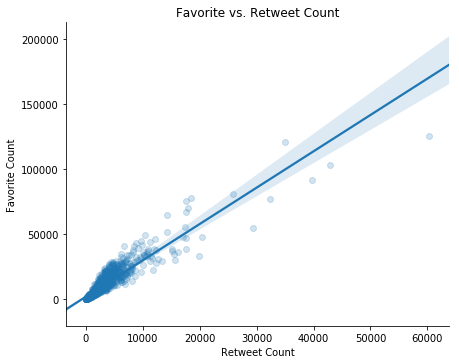

In [219]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.


In [220]:
# There are 3 outliers with a rating over 2.  
# Find them to see if they are inaccurate or just unique.
twitter.loc[twitter['rating'] > 2]

,tweet_id,timestamp,text,expanded_urls,name,rating,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
305,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",Sam,3.428571,5645,1554,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342
573,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,177.600000,5325,2606,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Unidentifiable,0.000000


The first instance is a rating of 24/7 = 3.428571 which is inaccurate and I didn't know how to fix it

In [222]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('twitter_archive_master.csv')


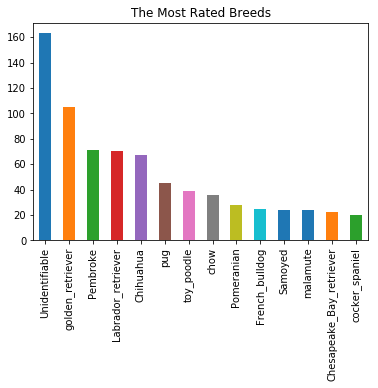

In [228]:
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

 It's difficult to know why these breeds are the top breeds.

In [229]:
top.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Chesapeake_Bay_retriever,22.0,1.077273,0.137778,0.9,1.000,1.00,1.200,1.300000
Chihuahua,67.0,1.049796,0.191331,0.3,1.000,1.10,1.200,1.400000
French_bulldog,25.0,1.128000,0.192614,0.8,1.000,1.20,1.300,1.400000
Labrador_retriever,70.0,1.121429,0.128416,0.7,1.100,1.10,1.200,1.300000
Pembroke,71.0,1.152113,0.136129,0.6,1.100,1.20,1.200,1.400000
Pomeranian,28.0,1.081250,0.154654,0.6,1.000,1.10,1.200,1.400000
Samoyed,24.0,1.154167,0.138247,0.7,1.100,1.15,1.300,1.300000
Unidentifiable,163.0,2.018405,13.840294,0.2,0.800,1.00,1.100,177.600000
chow,36.0,1.144444,0.146277,0.7,1.100,1.20,1.200,1.300000


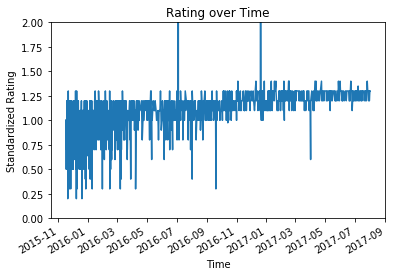

In [233]:
# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

 it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there many ratings below 1, while after that time there are barely any.
